In [1]:
import geopandas as gpd
import osmnx as ox
import numpy as np

### Na pasta que enviei, existem alguns arquivos:
- Base de faces de logradouros (seções de via divididas por quarteirão);
- Base do Cadastro Nacional de Endereços para Fins Estatísticos (CNEFE);
- Base de Setores censitários do IBGE;
- Dados estatísticos do IBGE agregados por setor censitário.

Esses arquivos provavelmente não serão todos utilizados pelos dois, mas existe bastante interseção então estou mandando exemplos de todos. Vou compartilhar o conjunto completo de dados na pasta do drive, mas são muitos arquivos, cuidado para não encher a memória do PC.

Mas antes de começar, vamos aprender algumas funcionalidades do Python para explorar arquivos no computador. Vamos acabar utilizando muito isso porque nossos arquivos têm fontes diferentes em muitos casos. O módulo principal para se lidar com arquivos do Sistema Operacional é o `os`, mas eu costumo utilizar o `glob` com mais frequência. Vou mostrar como mexer com os dois.

In [2]:
import os
from glob import glob

O os é utilizado para operações básicas de sistema operacional, como **mudar pasta de trabalho**, **deletar ou renomear arquivos**, **listar arquivos na pasta**, etc. Os comandos a seguir são alguns exemplos: 

In [3]:
#pega o caminho do diretório de trabalho atual
wdir = os.getcwd()
print("Diretório atual de trabalho: ", wdir)

#o diretório de trabalho é a pasta em que o Python está rodando
#no diretório atual existe um arquivo chamado "simple_text.txt", que podemos abrir.
file = open('simple_text.txt')
print("\nPrimeira linha do arquivo: ", file.readline())

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2

Primeira linha do arquivo:  "nothing_here"


In [4]:
#agora vamos mudar a pasta de trabalho para uma subpasta da pasta de trabalho
os.chdir('dados_temp')
#imprime o novo caminho
new_wdir = os.getcwd()
print("Diretório atual de trabalho: ", new_wdir)

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2\dados_temp


In [5]:
#nesse novo diretório `dados_temp` não existe um arquivo chamado "simple_text.txt"
#portanto esse comando nessa pasta deve falhar.
file = open('simple_text.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'simple_text.txt'

In [6]:
#ainda dá para abrir esse arquivo, mas você precisa passar o caminho completo
#Essa é a maneira preferível de se acessar arquivos, ficar mudando de pasta
#de trabalho pode enrolar as coisas.
file = open('D:\\Andre/Novo_Python\\IC-Tutoriais\\2\\simple_text.txt')
print("\nPrimeira linha do arquivo: ", file.readline())


Primeira linha do arquivo:  "nothing_here"


In [7]:
#vamos voltar ao diretório original. O código a seguir volta um diretório como o "<-" do windows
os.chdir('..')
new_wdir = os.getcwd()
print("Diretório atual de trabalho: ", new_wdir)

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2


In [8]:
#para listar os arquivos e pastas de um diretório:
os.listdir()

['.ipynb_checkpoints',
 'André.ipynb',
 'BASE DE INFORMACOES POR SETOR CENSIT╡RIO Censo 2010 - Universo.pdf',
 'cache',
 'dados_temp',
 'Full.ipynb',
 'Gerardo.ipynb',
 'simple_text.txt']

Conseguir a lista de arquivos em um determinado diretório é a tarefa que mais vamos usar, mas a biblioteca glbo é melhor que o os para essa tarefa. nela podemos especificar que palavras chave procuramos nos arquivos. Por exemplo, se quisermos todas as pastas com "Tracts" no meio do nome dentro da pasta "dados_temp":

In [9]:
glob('dados_temp\\*Tracts*')

['dados_temp\\Census_Tracts_Geographic_Data',
 'dados_temp\\Census_Tracts_Statistic_Data']

São duas pastas encontradas. Esse método é útil porque em geral os arquivos do IBGE são referênciados pelo código da cidade. Por exemplo **1200328** é o código da cidade **Jordão**, no estado do Acre e se quisermos os arquivos de logradouros dessa cidade específica, queremos os arquivos que começam com esse código na pasta **Census_Streets_Geographic_Data**

In [10]:
glob('dados_temp\\Census_Streets_Geographic_Data\\1200328*')

['dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.cpg',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.dbf',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.prj',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shp',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shx']

Para ler no GeoPandas, em geral só precisamos do caminho do arquivo com extensão `.shp`:

In [11]:
file = glob('dados_temp\\Census_Streets_Geographic_Data\\1200328*.shp')
file[0]

'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shp'

A lógica é sempre essa, no glob o `*` é caractere coringa que significa *qualquer coisa*. Ou seja, estamos buscando arquivos que começam com o código, têm alguma coisa a mais no meio (ou nada, o `*` também pode substituir o *nada*) e termina com a extensão `.shp`. Mas no caso de estarmos explorando mais de uma pasta, é preciso indicar que existem diretórios intermediários:

In [12]:
#dentro da pasta "Census_Tracts_Geographic_Data" existem duas pastas.
#Queremos qualquer arquivo com extensão ".shp" dentro de qualquer dessas pastas:
files = glob('dados_temp\\Census_Tracts_Geographic_Data\\*\\*.shp')
#deve haver um arquivo na pasta "ac_setores_censitarios" e outro na "ac_setores_censitarios"
files

['dados_temp\\Census_Tracts_Geographic_Data\\ac_setores_censitarios\\12SEE250GC_SIR.shp',
 'dados_temp\\Census_Tracts_Geographic_Data\\al_setores_censitarios\\27SEE250GC_SIR.shp']

<AxesSubplot:>

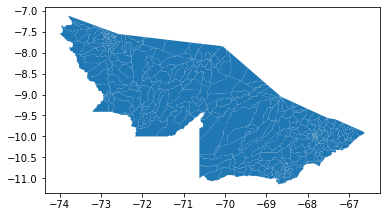

In [13]:
#podemos ler o primeiro arquivo, como fizemos no tutorial
gdf = gpd.read_file(files[0])
gdf.plot()

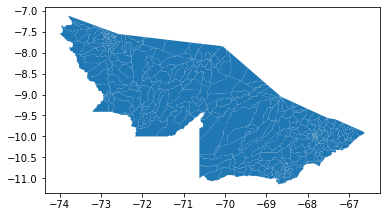

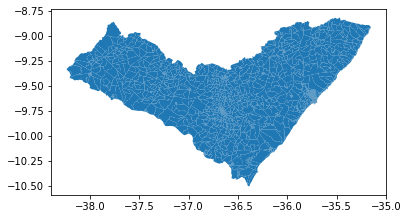

In [14]:
#ler os arquivos em um for
for file in files:
    gdf = gpd.read_file(file)
    gdf.plot()

No momento estamos utilizando arquivos da pasta onde o jupyter-notebook está, mas como os arquivos que vamos utilizar são relativamente numerosos e grandes, eu prefiro utilizar os arquivos diretamente do drive. Existem bibliotecas dedicadas a isso, mas no windows é muito mais fácil instalar o drive para desktop e utilizar os arquivos direto do disco local "G:\" que é o disco padrão da nuvem da Google (pode ter outro nome caso tenha sido alterado na instalação).

https://www.google.com/intl/pt-BR/drive/download/

No exemplo abaixo, vou utilizar os arquivos de uma pasta do meu google drive, mas vou compartilhar com vocês a parta com todos os dados que utilizarão.

*Obs: Os primeiros dois números do código de uma cidade expressam o estado ao qual a cidade pertence. 27, por exemplo, quer dizer que o estado é Alagoas. Aliás, todos os estados do nordeste começam com 2,
os do norte com 1, sudeste com 3, sul 4 e centro-oeste com 5.*

In [15]:
#todos os arquivos que se referem a Alagoas:
alagoas = "G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27*.shp"
print("arquivos de Alagoas:")
a_files = glob(alagoas)
a_files

arquivos de Alagoas:


['G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27SEE250GC_SIR.shp']

In [16]:
#todos os arquivos que se referem do Nordeste:
ne = "G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\2*.shp"
print("\n\narquivos do NE:")
ne_files = glob(ne)
ne_files



arquivos do NE:


['G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\22SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\23SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\29SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\24SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\21SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\25SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\26SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\28SEE250GC_SIR.shp']

<AxesSubplot:>

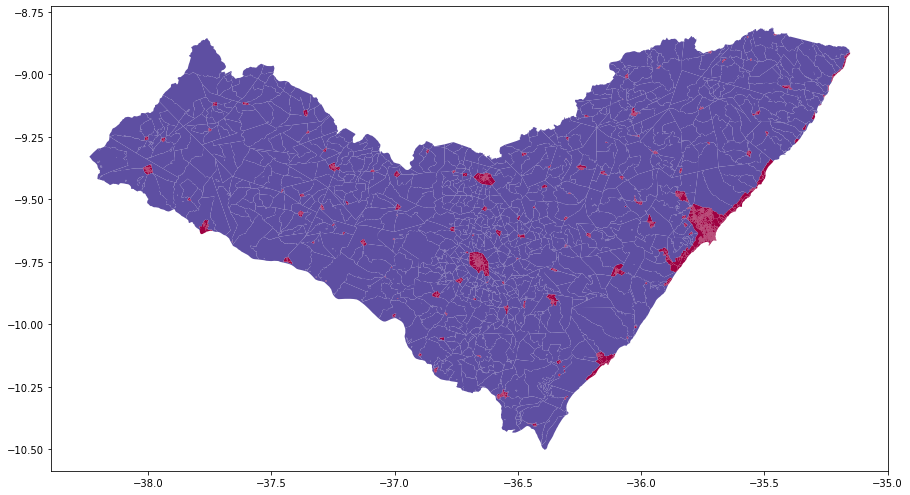

In [17]:
#e podemos carreagr pos arquivos direto do drive
gdf = gpd.read_file(a_files[0])
#plotar plotar regiões urbanas e rurais com cores diferentes:
gdf['colors'] = [1 if n else 0 for n in gdf['TIPO']=='URBANO']
gdf.plot(column='colors',cmap='Spectral_r',
         figsize=(15,10))

# Específico Gerardo

Vou apresentar uns elementos de grafos nessa seção, mas primeiro vou apresentar um banco de dados geográficos do IBGE de forma que possamos obter os dados de forma mais precisa.

## Parte 1: Lidando com dados do IBGE

O IBGE divide seu banco de dados do último censo (2010) em duas parcelas, uma contendo os arquivos geográficos e outra contendo os arquivos estatísticos. Isso acontece porque os dados estatísticos coletados pelo IBGE são muito detalhados e é complicado lidar com eles se eles estiverem em um arquivo só.

Os dados geográficos que temos estão separados por Estado, vamos carregar algum deles direto do drive:

<AxesSubplot:>

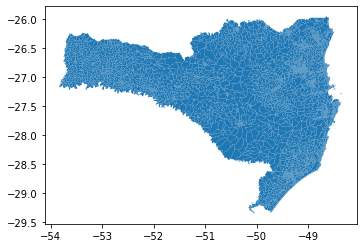

In [18]:
#alterar linha abaixo com o caminho do seus dados no disco G: 
#ou, caso tenha optado por fazer o download dos arquivos, 
#a pasta onde estão 
d_path =  ('G:\\Shared drives\\Grupo de Pesquisa ITS\\04_students\\AndreMorelli\\_Dados\\Base Para IC - Andre+Gerardo')

#os arquivos geográficos estão em 'Census_Tracts_Geographic_Data" 
#em pastas específicas por estado. Vamos pegar Santa Catarina (cod. 42) por hora
ac_file = glob(d_path + '\\Census_Tracts_Geographic_Data\\*\\42*.shp')[0]
gdf = gpd.read_file(ac_file)
gdf.plot()

In [19]:
#vamos ver o que há no gdf
gdf.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,44537,420130705000046,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.71157 -26.38866, -48.70895 -26.3..."
1,44538,420130705000047,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.82491 -26.44796, -48.82477 -26.4..."
2,44539,420130705000048,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.81705 -26.44451, -48.81652 -26.4..."


Em geral, vamos trabalhar apenas na escala urbana. Note que no gdf existem vários códigos específicos:
- CD_GEOCODI: Código da zona censitária
- CD_GEOCODB: Código do bairro
- CD_GEOCODS: Código do subdistrito
- CD_GEOCODD: Código do distrito
- CD_GEOCODM: Código do município

Em teoricamente, é possível filtrar os dados de uma cidade específica pelo nome, mas existem muitas divergências na nomenclatura de cidades ("Ribeirão Preto" pode ser "Ribeirao Preto"; "Santa Barbára do Oeste" pode também ser "Santa Barbára d´Oeste"). Dessa forma, é mais seguro trabalhar com o código de município. No arquivo `municípios.csv` todas as cidades brasileiras são catalogadas com seu respectivo código (coluna IBGE7).

Vamos olhar para Arvoredo - `Cod. 4201653`

<AxesSubplot:>

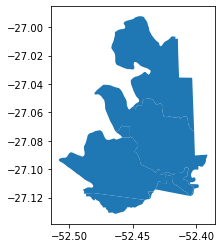

In [20]:
arv = gdf[gdf['CD_GEOCODM']=='4201653']
arv.plot()

Tendo a geometria da região, podemos extrair um grafo a partir do polígono exterior. Mas primeiro vamos mudar o sistema de coordenadas para um mais alinhado com o OpenStreetMap

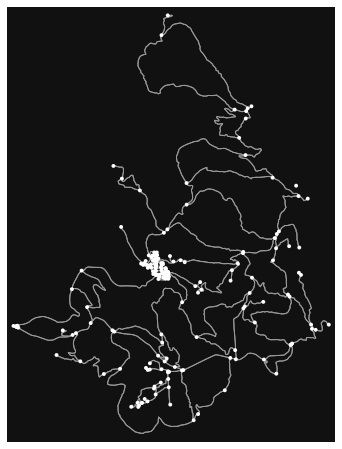

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [21]:
#mudança de sistema de coordenadas
arv = arv.to_crs('epsg:4326')

#pegar polígono e extrair grafo
poly = arv.geometry.unary_union
G = ox.graph_from_polygon(poly, network_type='drive',retain_all=True)
ox.plot_graph(G)

## Parte 2: Centralidades do grafo
Agora vamos calcular centralidades no grafo. Centralidade são características influenciadas pela topologia do grafo (maneira como os elementos estão conectados entre si). Algumas métricas interessantes que vamos explorar são:

- Centralidade de proximidade (closeness): quanto maior a centralidade de proximidade de um nó no grafo, menor sua distância média até outros nós no grafo. Em geral, pontos mais centrais na rede possuim maior centralidade de proximidade, contudo nem sempre já que as distâncais que medimos são distâncias em rede e não euclidianas.
- Centralidade de intermediação (betweenness): Quanto maior a centralidade de intermediação, maior a importância de um nó ou aresta para conectar outros elementos uns aos outros. Uma ponte ou túnel entre duas regiões de uma cidade é um exemplo de elemento com muita centralidade de intermediação já que qualquer caminho que saia de uma das regiões e vá a outra precisa necessariamente passar por essa ponte/túnel 
- Centralidade de grau: Quanto maior a centralidade de grau, maior o número de aresta (vias) conectadas a um determinado nó. Nós com maior centralidade de grau em geral possuem maior importância nas redes, um nó com grau 8, por exemplo, representa uma interseção entre duas avenidadas enquanto um nó de grau 4 representa o cruzamento entre duas vais de mão simples.

A biblioteca que utilizaremos por hora para calcular essas métricas é a NetworkX, contudo essa biblioteca é programada em Python puro, o que faz dela muito lenta (os códigos abaixo podem levar algum tempo para rodar  caso utilize uma cidade maior), principalemente para grafos maiores. No futuro, vou te ensinar a instalar e utilizar a biblioteca python-iGraph e utilizar operações mais rápidas.

In [22]:
import networkx as nx

#converte para DiGraph do networkx apra os algoritmos funcionarem
G2 = nx.DiGraph(G)

# betweenness pode ser calculada para nós ou para arestas
# nesse caso, utilizaremos como peso o comprimento da via
# ou seja, os caminhos conectando dois pontos serão os que
# minimizam o comprimento da rota

#para nós
node_betweenness = nx.betweenness_centrality(G2,weight='length')
node_betweenness

{1110939872: 0.04438895417156287,
 1110939875: 0.061016451233842535,
 1110940146: 0.036692126909518216,
 1110940169: 0.2813748531139835,
 1110940205: 0.1081668625146886,
 1110940209: 0.026556991774383077,
 1110940413: 0.03578143360752056,
 1110940591: 0.07508813160987074,
 1110940685: 0.0799059929494712,
 1551950984: 0.2551410105757932,
 1551951045: 0.1709753231492362,
 1551951086: 0.14903055229142184,
 1551951193: 0.1542596944770858,
 1551951196: 0.0,
 1551951198: 0.09033490011750882,
 1551951264: 0.11257344300822561,
 1551951291: 0.08766157461809636,
 1551951389: 0.06903642773207991,
 1551951401: 0.10305522914218566,
 1551951536: 0.22411868390129258,
 1551951620: 0.17558754406580493,
 1551951624: 0.17547003525264396,
 1551951665: 0.33821974148061107,
 1551951690: 0.2122502937720329,
 1551951761: 0.0971797884841363,
 1551951840: 0.17491186839012926,
 1551960278: 0.05252643948296122,
 2053233876: 0.0053760282021151585,
 2054273535: 0.20522914218566393,
 2054273542: 0.18954171562867214,

In [23]:
#para arestas
edge_betweenness = nx.edge_betweenness(G2,weight='length')
edge_betweenness = {e+(0,):v for e,v in edge_betweenness.items()}
edge_betweenness

{(1110939872, 2054273896, 0): 0.025167102586457425,
 (1110939872, 1110940146, 0): 0.023190932868352224,
 (1110939872, 6391741602, 0): 0.0009009009009009009,
 (1110939875, 2054273896, 0): 0.027114210985178726,
 (1110939875, 4343465329, 0): 0.03414705027608254,
 (1110939875, 6391741602, 0): 0.004446381865736705,
 (1110940146, 1110939872, 0): 0.022231909328683522,
 (1110940146, 8040041358, 0): 0.01941296134844522,
 (1110940169, 6629889434, 0): 0.11464690496948561,
 (1110940169, 6629884902, 0): 0.06015693112467306,
 (1110940169, 6629895336, 0): 0.10889276373147341,
 (1110940205, 2054273878, 0): 0.04126707352513804,
 (1110940205, 1110940591, 0): 0.04112176692821854,
 (1110940205, 8757169155, 0): 0.02996222028480093,
 (1110940209, 2054273863, 0): 0.012641673931996512,
 (1110940209, 2054273843, 0): 0.01897704155768672,
 (1110940413, 1110940209, 0): 0.012351060738157513,
 (1110940413, 2054273843, 0): 0.01034582970066841,
 (1110940413, 5130902418, 0): 0.01804707933740192,
 (1110940591, 11109402

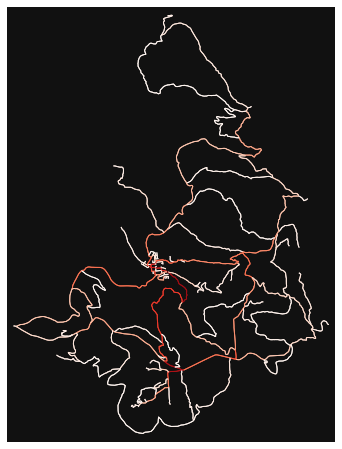

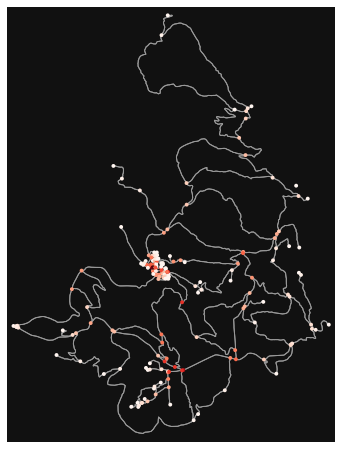

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [24]:
# Podemos adicionar as informações ao grafo e plotar

#retorna para MultiDiGraph para plotar:
G2 = nx.MultiDiGraph(G2)

nx.set_node_attributes(G2,node_betweenness,'betweenness')
nx.set_edge_attributes(G2,edge_betweenness,'betweenness')

colors = ox.plot.get_edge_colors_by_attr(G2,'betweenness',cmap='Reds',equal_size=True)
ox.plot_graph(G2,edge_color=colors,node_size=0)

colors = ox.plot.get_node_colors_by_attr(G2,'betweenness',cmap='Reds',equal_size=True)
ox.plot_graph(G2,node_color=colors)

In [25]:
# para closeness é a mesma coisa, mas Closeness só está definido para nós do grafo

#converte para DiGraph do networkx apra os algoritmos funcionarem
G2 = nx.DiGraph(G2)

#para nós. obs: "distance" é o mesmo que o "weigth" da função do betweenness
node_closeness = nx.closeness_centrality(G2, distance='length')
node_closeness

{1110939872: 0.00013185102428058513,
 1110939875: 0.00014402780391581328,
 1110940146: 0.00013120175065441111,
 1110940169: 0.00015299938931671636,
 1110940205: 0.00013717170960243633,
 1110940209: 0.00010837164428552671,
 1110940413: 0.00010815955034415085,
 1110940591: 0.00012710526481703936,
 1110940685: 0.00013410988445845167,
 1551950984: 0.00020260999962125832,
 1551951045: 0.00020080956652549482,
 1551951086: 0.00020456698513948184,
 1551951193: 0.00020494682863149422,
 1551951196: 0.00011291716289310992,
 1551951198: 0.00020317110463487486,
 1551951264: 0.00016897403099995508,
 1551951291: 0.00016684131768996584,
 1551951389: 0.00013504428129875362,
 1551951401: 0.00013692502356474066,
 1551951536: 0.00018588330444509944,
 1551951620: 0.00020043918631156883,
 1551951624: 0.00020284240092506328,
 1551951665: 0.00020415942688751618,
 1551951690: 0.00020277007631867993,
 1551951761: 0.00013899044226004214,
 1551951840: 0.00020154206601991512,
 1551960278: 0.00010865092222343172,
 

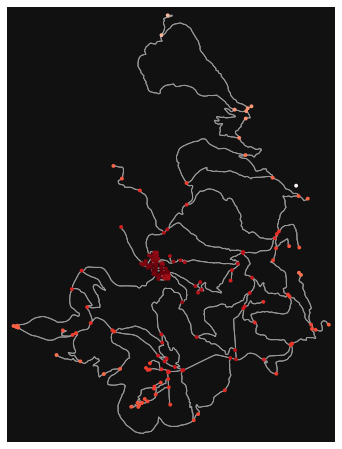

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [26]:
# Podemos adicionar as informações ao grafo e plotar

#retorna para MultiDiGraph para plotar:
G2 = nx.MultiDiGraph(G2)

nx.set_node_attributes(G2,node_closeness,'closeness')

colors = ox.plot.get_node_colors_by_attr(G2,'closeness',cmap='Reds',equal_size=True)
ox.plot_graph(G2,node_color=colors)

In [27]:
# e grau, também só definida para nós:

#converte para DiGraph do networkx apra os algoritmos funcionarem
G2 = nx.DiGraph(G2)

# nesse caso, não há pesos porque essa função independe de distância
node_degree = dict(nx.degree(G2))
node_degree

{1110939872: 6,
 1110939875: 6,
 1110940146: 4,
 1110940169: 6,
 1110940205: 6,
 1110940209: 4,
 1110940413: 5,
 1110940591: 6,
 1110940685: 6,
 1551950984: 6,
 1551951045: 8,
 1551951086: 6,
 1551951193: 6,
 1551951196: 2,
 1551951198: 6,
 1551951264: 6,
 1551951291: 6,
 1551951389: 6,
 1551951401: 6,
 1551951536: 6,
 1551951620: 6,
 1551951624: 6,
 1551951665: 8,
 1551951690: 4,
 1551951761: 6,
 1551951840: 6,
 1551960278: 4,
 2053233876: 2,
 2054273535: 8,
 2054273542: 6,
 2054273562: 8,
 2054273563: 6,
 2054273567: 6,
 2054273590: 6,
 2054273591: 6,
 2054273597: 6,
 2054273697: 6,
 2054273843: 3,
 2054273844: 3,
 2054273863: 4,
 2054273867: 4,
 2054273871: 3,
 2054273878: 6,
 2054273896: 6,
 3678175792: 6,
 3678175794: 6,
 3678175796: 2,
 3678175797: 6,
 3678175799: 6,
 3678175803: 6,
 3678175804: 2,
 3678175805: 2,
 3678175806: 2,
 3678175807: 2,
 3678175809: 6,
 3678178539: 6,
 3678178543: 6,
 3678178544: 6,
 3678178545: 6,
 3678178546: 2,
 3678178547: 6,
 3678178548: 6,
 3678178

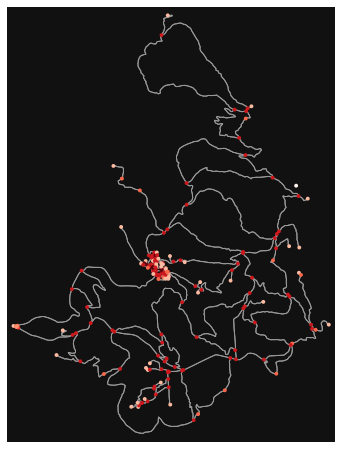

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [28]:
#retorna para MultiDiGraph para plotar:
G2 = nx.MultiDiGraph(G2)

nx.set_node_attributes(G2,node_degree,'degree')

colors = ox.plot.get_node_colors_by_attr(G2,'degree',cmap='Reds',equal_size=True)
ox.plot_graph(G2,node_color=colors)

*Importante: Essa parte de centralidades vem da teoria dos grafos e pode causar certo estranhamento de início, seria interessante se familiarizar com alguns coceitos lendo o artigo de cada uma dessas centralidades na wikipedia ou assistindo alguns vídeos no YouTube*

## Parte 3: Fundindo dados
Agora, uma parte importante para sua IC é utilizar dados do grafo e dos setores censitários em conjunto. Vamos obter dois GeoDataFrames a partir do grafo que extraímos, um é um arquivo de pontos que contem os nós do grafo e outro um arquivo de linahs que contém as arestas.

<AxesSubplot:>

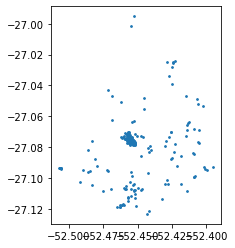

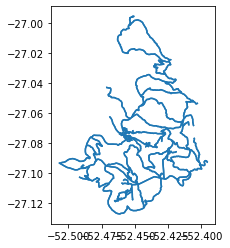

In [29]:
nodes, edges = ox.graph_to_gdfs(G2)
nodes.plot(markersize=3)
edges.plot()

Como já atribuimos as centralidades ao grafo, quando geramos os GeoDataFrames eles devem conter as informações que calculamos. O de **nós** deve ter a intermediação, proximidade e o grau e o de **arestas** deve possuir a intermediação.

In [30]:
nodes.head(3)

,y,x,street_count,betweenness,closeness,degree,highway,geometry
osmid,,,,,,,,
1110939872,-27.099257,-52.408594,3,0.044389,0.000132,6,NaN,POINT (-52.40859 -27.09926)
1110939875,-27.104018,-52.418202,3,0.061016,0.000144,6,NaN,POINT (-52.41820 -27.10402)
1110940146,-27.098961,-52.408176,3,0.036692,0.000131,4,NaN,POINT (-52.40818 -27.09896)


In [31]:
edges.head(3)

osmid lanes     ref                      name  \
u          v          key                                                      
1110939872 2054273896 0    194917239     2  SC-283  Rodovia Thomaz Morandini   
           1110940146 0    194917239     2  SC-283  Rodovia Thomaz Morandini   
           6391741602 0    682514515   NaN     NaN                       NaN   

                                highway maxspeed  oneway    length  \
u          v          key                                            
1110939872 2054273896 0         primary       40   False    23.341   
           1110940146 0         primary       40   False    53.245   
           6391741602 0    unclassified      NaN   False  1415.794   

                           betweenness  \
u          v          key                
1110939872 2054273896 0       0.025167   
           1110940146 0       0.023191   
           6391741602 0       0.000901   

                                                                    geometry  \
u          v          key                                                      
1110939872 2054273896 0    LINESTRING (-52.40859 -27.09926, -52.40872 -27...   
           1110940146 0    LINESTRING (-52.40859 -27.09926, -52.40841 -27...   
           6391741602 0    LINESTRING (-52.40859 -27.09926, -52.40843 -27...   

                          junction bridge  
u          v          key                  
1110939872 2054273896 0        NaN    NaN  
           1110940146 0        NaN    NaN  
           6391741602 0        NaN    NaN

Vamos adicionar esses atributos ao arquivo de setores censitários.

Primeiro vamos lidar com os nós que, como arquivo de pontos, é mais direto na junção

In [32]:
joined = gpd.sjoin(arv, nodes)
joined.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_MESO,geometry,index_right,y,x,street_count,betweenness,closeness,degree,highway
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273597,-27.077354,-52.456484,3,0.123032,0.000203,6,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273591,-27.077221,-52.456531,3,0.143801,0.000203,6,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273590,-27.077197,-52.456136,3,0.094330,0.000203,6,NaN


O arquivo `joined` agora possui uma linha para cada nó do grafo, com uma referência ao ID do setor censitário dentro do qual o nó está. Agora nós podemos adicionar informações dos nós às áreas dos setores iterando pelos `CD_GEOCODI`. Por exemplo, sequisermos saber o betweenness médio no setor com código `420165305000001` podemos filtrar o arquivo `joined` e depois faze uma média nos valores que sobraram:

In [33]:
# filtrar joined
temp = joined[joined['CD_GEOCODI']=='420165305000001']
temp.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,NM_MESO,geometry,index_right,y,x,street_count,betweenness,closeness,degree,highway
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273597,-27.077354,-52.456484,3,0.123032,0.000203,6,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273591,-27.077221,-52.456531,3,0.143801,0.000203,6,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",2054273590,-27.077197,-52.456136,3,0.094330,0.000203,6,NaN


In [34]:
# média
bet_med = temp['betweenness'].mean()
bet_med

0.08378057899797033

Épossível fazer isso para todo o banco de dados fazendo um loop por todos os valores únicos de ID no banco de dados original dos setores censitários (arv). Vamos colocar a lista de médias em uma lista para depois poder adicionar ao banco de dados.

In [35]:
bet_med = []
for geocode in arv['CD_GEOCODI']:
    temp = joined[joined['CD_GEOCODI']==geocode]
    bet_med.append(temp['betweenness'].mean())
    
arv['node_betweenness'] = bet_med
arv.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,node_betweenness
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",0.083781
563,44689,420165305000002,RURAL,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.46340 -27.07357, -52.46403 -27.0...",0.061941
564,44690,420165305000003,RURAL,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.50848 -27.09360, -52.50819 -27.0...",0.059507


Agora existe uma coluna betweenness no arquivo de áreas. Podemos plotar ele e adicionar as outras informaç~eos de nós também

<AxesSubplot:>

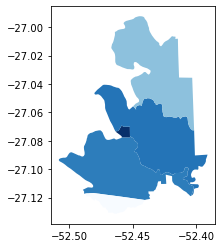

In [36]:
arv.plot(column='node_betweenness',cmap='Blues')

In [37]:
# adicionar as outras características dos nós
for attribute in ['closeness','degree']:
    attr_med = []
    for geocode in arv['CD_GEOCODI']:
        temp = joined[joined['CD_GEOCODI']==geocode]
        attr_med.append(temp[attribute].mean())

    arv['node_'+attribute] = attr_med

In [38]:
arv.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,node_betweenness,node_closeness,node_degree
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.45877 -27.06928, -52.45709 -27.0...",0.083781,0.000197,5.127273
563,44689,420165305000002,RURAL,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.46340 -27.07357, -52.46403 -27.0...",0.061941,0.000148,4.744186
564,44690,420165305000003,RURAL,None,None,42016530500,None,420165305,ARVOREDO,4201653,ARVOREDO,CONCÓRDIA,OESTE CATARINENSE,"POLYGON ((-52.50848 -27.09360, -52.50819 -27.0...",0.059507,0.000137,4.647059


Agora para os atributos de arestas o processo é um pouco mais complicado. Isso porque nada impede um segmento de via de interseccionar mais de um setor censitário ao mesmo tempo. Por isso existem escolhas a serem feitas. Podemos:

    1. Considerar a via pertencendo a mais de um setor, entrando na média de todos os setores que a contém;
    2. Considerar que a via pertence ao setor que contém o ponto médio da via;
    3. Considerar que a via pertence ao setor que contém a maior parte da via.

Em geral o tipo de aboprdagem vai depender do problema. Seria interessante implementar todas as coisas para termos flexibilidade.

In [39]:
# 1. (mais simples)
# a operação padrão de fusão espacial faz a operação de interseção 
joined = gpd.sjoin(arv, edges)
joined.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,lanes,ref,name,highway,maxspeed,oneway,length,betweenness,junction,bridge
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,81.496,0.005347,NaN,NaN
564,44690,420165305000003,RURAL,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,81.496,0.005347,NaN,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,81.496,0.005347,NaN,NaN


In [40]:
# A operação considera mais de uma vez as arestas que pertencem a mais
# de um setor. Podemos notar isso ao ver que o arquivo final tem mais
# entradas que o arquivo de arestas original
print('arquivo inicial:', len(edges), 'entradas','\narquivo final:',len(joined), 'entradas')

arquivo inicial: 445 entradas 
arquivo final: 507 entradas


In [41]:
# o resto é igual

# filtrar joined
temp = joined[joined['CD_GEOCODI']=='420165305000001']
bet_med = temp['betweenness'].mean()
bet_med

0.034539663002661085

In [42]:
# 2. ponto médio
# Para encontrar o ponto mpedio, podemos usar o metodo representative_point()
central_points = edges.geometry.representative_point()
#mudar a geometria do GeoDataFrame para pontos:
edges_cp = edges.copy()
edges_cp['geometry'] = central_points

joined = gpd.sjoin(arv, edges_cp)
joined.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,lanes,ref,name,highway,maxspeed,oneway,length,betweenness,junction,bridge
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,57.721,0.005347,NaN,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,44.960,0.005347,NaN,NaN
562,44688,420165305000001,URBANO,None,None,42016530500,None,420165305,ARVOREDO,4201653,...,NaN,NaN,NaN,residential,NaN,False,275.385,0.015867,NaN,NaN


In [43]:
# agora a correspondência é exata
print('arquivo inicial:', len(edges), 'entradas','\narquivo final:',len(joined), 'entradas')

arquivo inicial: 445 entradas 
arquivo final: 445 entradas


In [44]:
# o resto é igual

# filtrar joined
temp = joined[joined['CD_GEOCODI']=='420165305000001']
bet_med = temp['betweenness'].mean()
bet_med

0.03489434134595423

In [45]:
# 3. maior comprimento
# Para encontrar o maior comprimento, o processo é um pouco mais complicado
# primeiro vamos criar um valor identificador para cada aresta:
edges['id'] = [n for n in range(len(edges))]
edges.head(3)

osmid lanes     ref                      name  \
u          v          key                                                      
1110939872 2054273896 0    194917239     2  SC-283  Rodovia Thomaz Morandini   
           1110940146 0    194917239     2  SC-283  Rodovia Thomaz Morandini   
           6391741602 0    682514515   NaN     NaN                       NaN   

                                highway maxspeed  oneway    length  \
u          v          key                                            
1110939872 2054273896 0         primary       40   False    23.341   
           1110940146 0         primary       40   False    53.245   
           6391741602 0    unclassified      NaN   False  1415.794   

                           betweenness  \
u          v          key                
1110939872 2054273896 0       0.025167   
           1110940146 0       0.023191   
           6391741602 0       0.000901   

                                                                    geometry  \
u          v          key                                                      
1110939872 2054273896 0    LINESTRING (-52.40859 -27.09926, -52.40872 -27...   
           1110940146 0    LINESTRING (-52.40859 -27.09926, -52.40841 -27...   
           6391741602 0    LINESTRING (-52.40859 -27.09926, -52.40843 -27...   

                          junction bridge  id  
u          v          key                      
1110939872 2054273896 0        NaN    NaN   0  
           1110940146 0        NaN    NaN   1  
           6391741602 0        NaN    NaN   2

In [46]:
# Agora fazer o sjoin normal, igual fizemos no item 1.

joined = gpd.sjoin(arv, edges)
joined.head(3)

# agora note que há algumas repetições no campo id
joined['id']

562    167
564    167
562    180
564    180
562    164
      ... 
565    206
565    432
565    207
565    205
565    204
Name: id, Length: 507, dtype: int64

In [47]:
# agora em todos os casos em que o id aparece mais de uma vez temos que 
# interseccionar e ver qual é maior

tracts = []
for edge_id, edge_geom in zip(edges['id'], edges['geometry']):
    temp = joined[joined['id']==edge_id]
    if len(temp) == 1: #se a via toda está contida em apenas um setor
        tracts.append(temp['CD_GEOCODI'].to_list()[0])
    else:
        #se não, devemos interseccionar a via e a área
        geocodes = temp['CD_GEOCODI'].to_list()
        l_max = 0
        
        for area,code in zip(temp['geometry'],temp['CD_GEOCODI']):
            length = edge_geom.intersection(area).length
            if length >= l_max:
                geocode = code #matém apenas o maior
        tracts.append(code)
edges['CD_GEOCODI'] = tracts

In [48]:
# agora o processo é similar, mas usaremos o GeoDataFrame edges, não o joined 

# filtrar edges
temp = edges[edges['CD_GEOCODI']=='420165305000001']
bet_med = np.percentile(temp['betweenness'],85)
bet_med

0.08237140366172624

# Para a IC
Agora começarão as tarefas relativas ao IC. Eu não programei nenhuma função que faça as coisas que estou pedindo nessas tarefas, então se considera que seja impossível ou que existe um jeito melhor de fazer, pode seguir do seu jeito. O que importa mais são os objetivos.

# Primeira tarefa: Grafo a partir de código da cidade

Essa vai ser a primeira parte do nosso módulo. Deve ser muito simples de implementar. Queremos passar o código de uma cidade qualquer e obter o grafo dessa cidade a partir da geometria dos setores censitários.

Então vamos fazer algo nessa linha: uma função que recebe o código de um município e extrai o Grafo referente a esse município. Lembre-se que os arquivos geográficos estão separados por estado, então você tem que carregar eles com os dois primeiros dígitos do código e depois filtrar o banco de dados pelo código completo. Além disso, é importante referenciar o local onde a pasta `Cesus_Tracts_Geographic_Data` está para o código funcionar em computadores diferentes.

Também é interessante que o código seja flexível. Por exemplo, se o código for `code=1200401` representado por um inteiro ou `code="1200401"` representado por uma string, o código deve retornar a mesma coisa.

In [49]:
def graph_from_tracts(code, files_path):
    ##início do código aqui##
    
    ##fim do código aqui##
    return G

# Segunda tarefa: Informações do grafo nos setores censitários

Essa vai ser uma parte mais trabalhosa, mas não acredito que seja muito difícil. Você deve criar uma função que receba um grafo, um GeoDataFrame e um atributo específico para agregar e retorna o GeoDataFrame com uma coluna contendo o atributo escolhido. Nesse caso se eu chamar a função `aggregate_data_on_gdf(gdf, G, attr='betweenness')` ele vai me retornar um GeoDataFrame com, por exemplo, a média dos betweenness, se o atributo for closeness, ele retorna o closeness.

Mas vamos adicionar algumas opções a essa função:
   1. A função deve conter um atributo do tipo `how` que pode ser uma das três características: `duplicate_intersection`, `centerpoint` ou `longer_chunk`; que vai dizer como considerar as interseções.
   2. A função deve conter um atributo `function` que vai ditar a operação de agregação que vai ser conduzida. Até agora nós fizemos apenas a média, mas nem sempre é isso que vamos querer. As operações que acredito serem as mais importantes por hora são: média (`.mean()`); mediana (`.median()`); soma (`.sum()`); contagem (`.count()`). Elas podem entrar como string no atributo `function` no estilo: `function='median'`
   3. Existem outras funções que podem entrar no atributo `function` que dependem do numpy (`import numpy as np`). Um exemplo seriam os percentis. Nesses casos, em vez de fazer `valor = temp['betweenness'].função()` tem que fazer `valor = np.função(temp['betweenness'])`. No caso dos percentis, os mais interessantes são o 15, 25, 75 e 85 mas se conseguir fazer uma função que roda indiferente do inteiro pedido, melhor. Todos utilizam a mesma função do numpy, mas para pegar o 15° percentil, você usa `np.percentile(temp['betweenness'], 15)`; para o 25°, você usa `np.percentile(temp['betweenness'], 25)` e assim por diante. Esses percentis devem ser retornados se a cahmada for feita, por exemplo, com `function='15percentile'`

In [50]:
def aggregate_data_on_gdf(gdf, G, attr, 
                          how='duplicate_intersection',
                          funtion = 'mean'):

    ##início do código aqui##
    
    #**ideia para o "percentile" com inteiro arbitrário
    if 'percentile' in funtion:
        #remove o "percentile" da função e deixa só o número
        percent = function.replace('percentile','')
        percent = int(percent) #transforma em inteiro
        attr_med.append(np.percentile(temp[attr], percent))
    #**ideia para o "percentile" com inteiro arbitrário
    
    ##fim do código aqui##
    
    
    return gdf_with_data